# 지도 학습(c)

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.8 커널 서포트 벡터 머신
    - 2.3.9 신경망(딥러닝)

## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import *

## 커널 서포트 벡터 머신

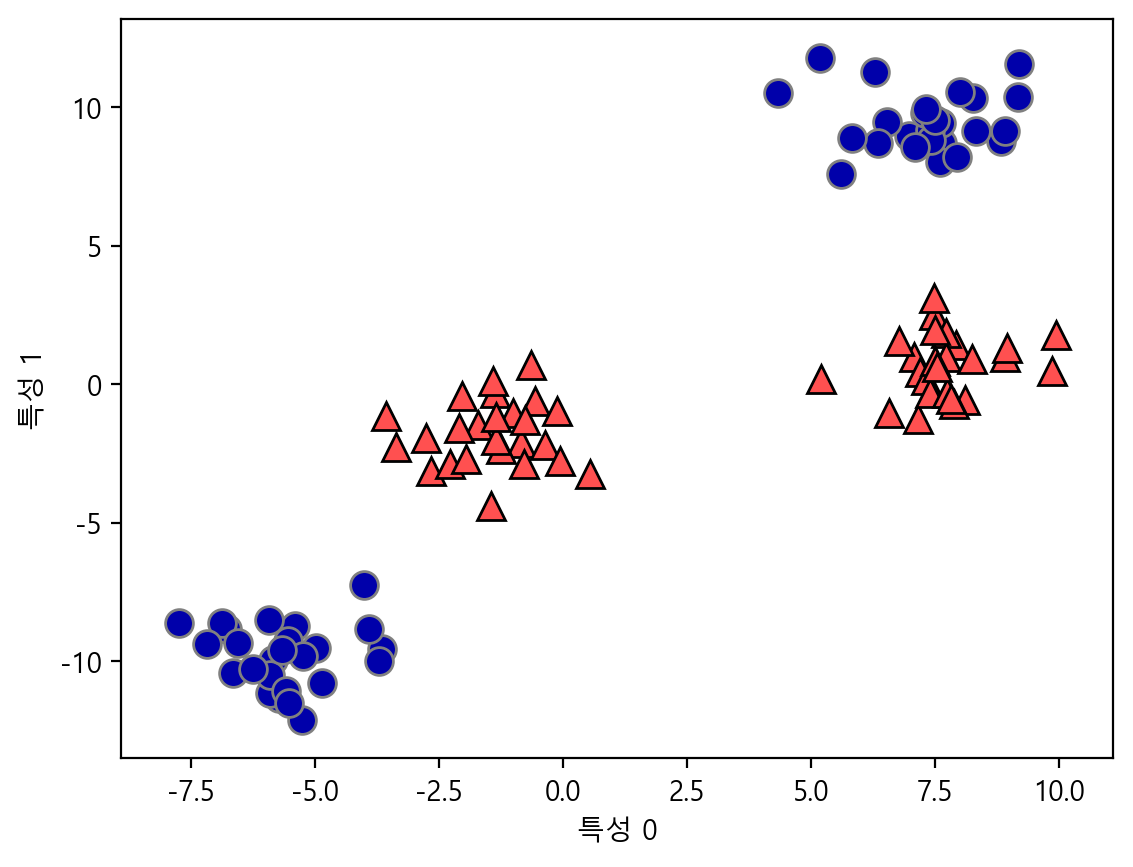

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

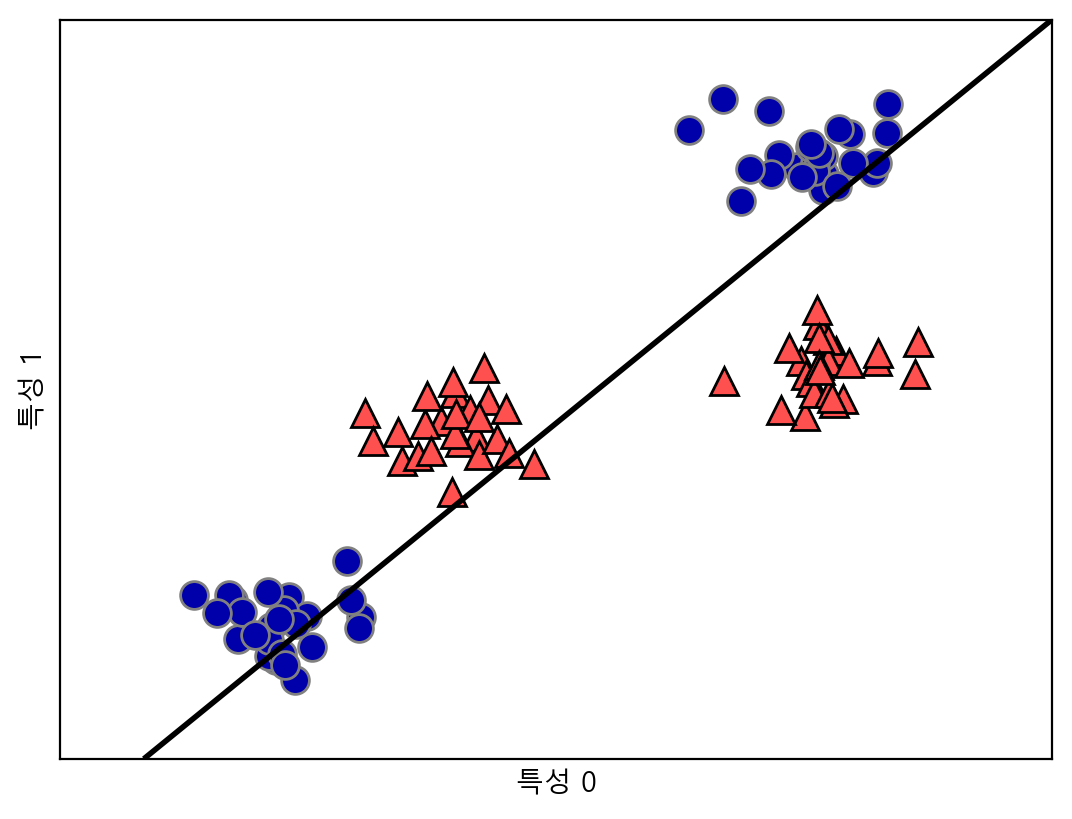

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3, dual="auto").fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

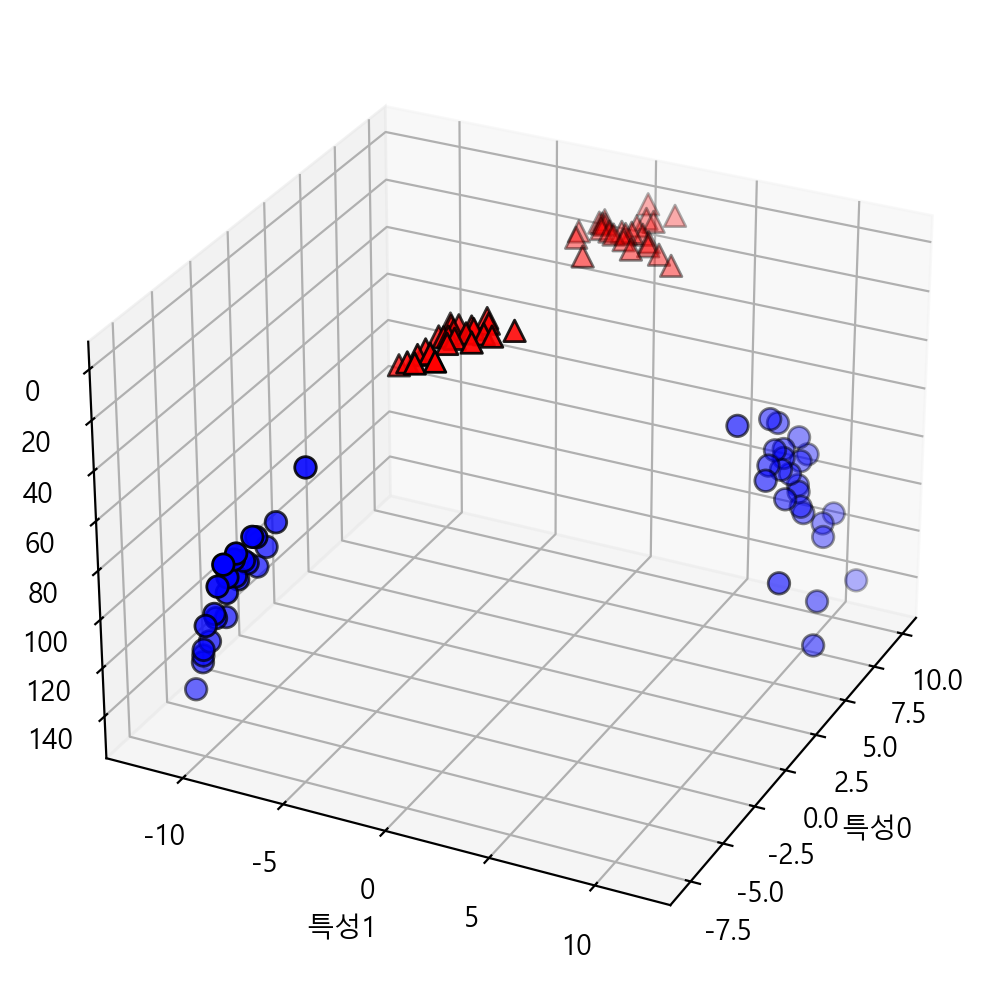

In [5]:
# 데이터 제곱
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
mask = y == 0 # y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

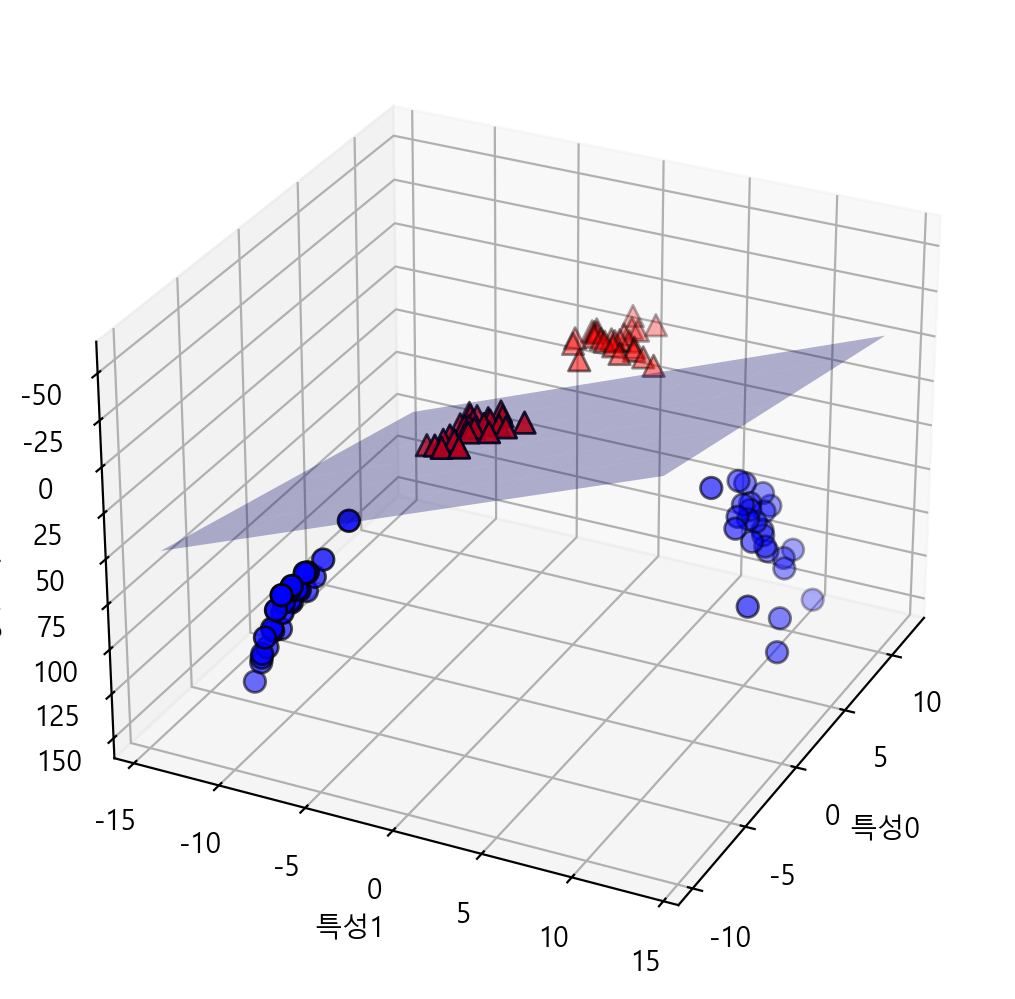

In [6]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

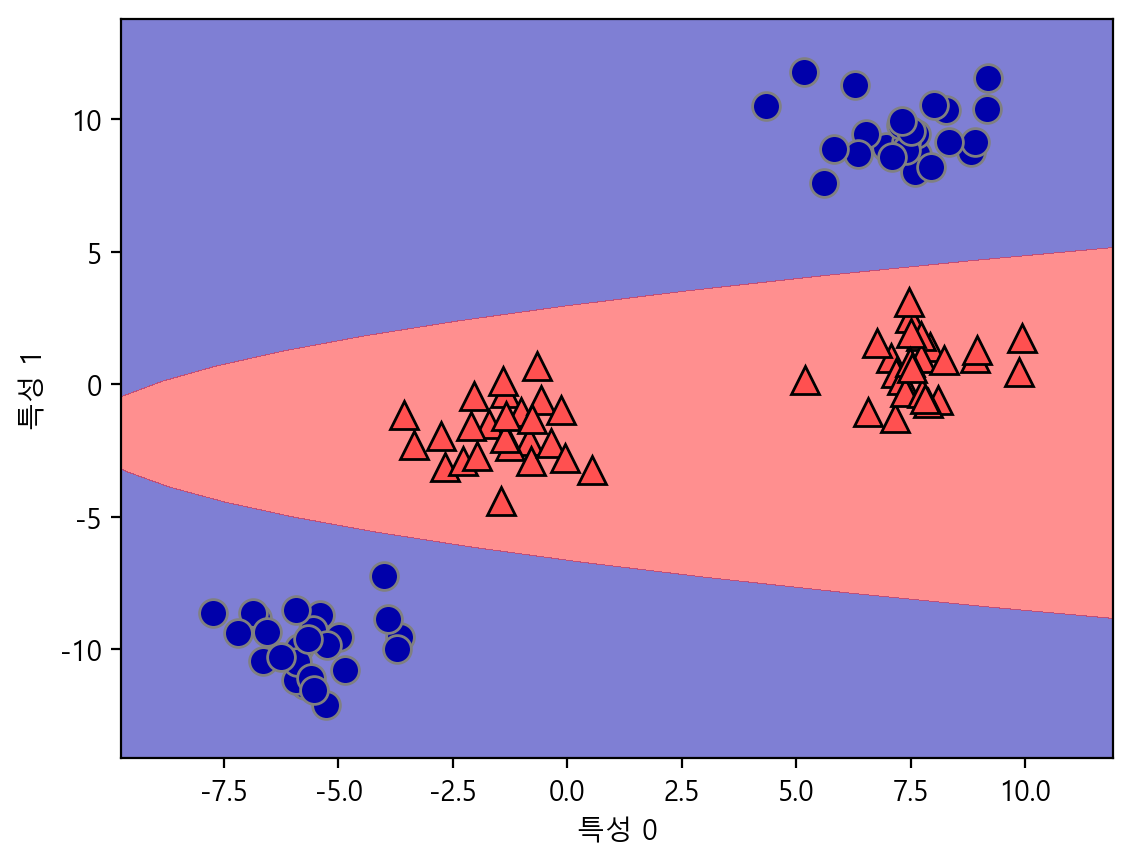

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

### SVM 이해하기

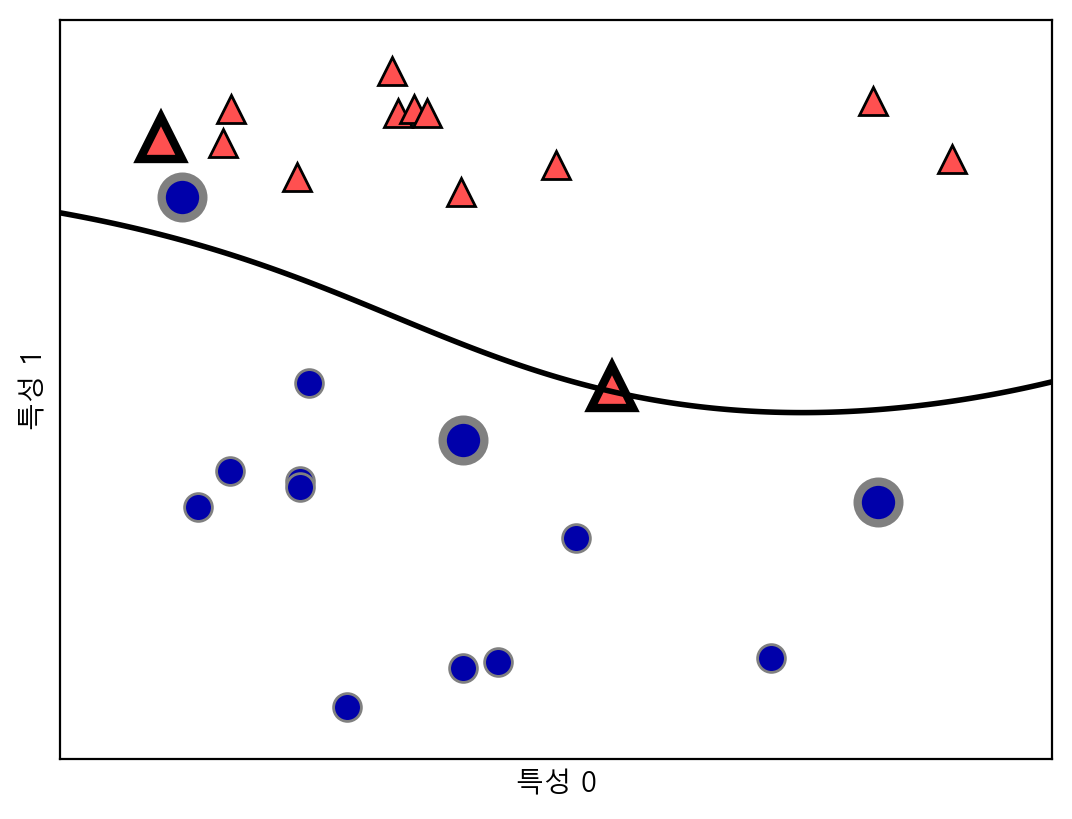

In [8]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

### C와 gamma의 이해

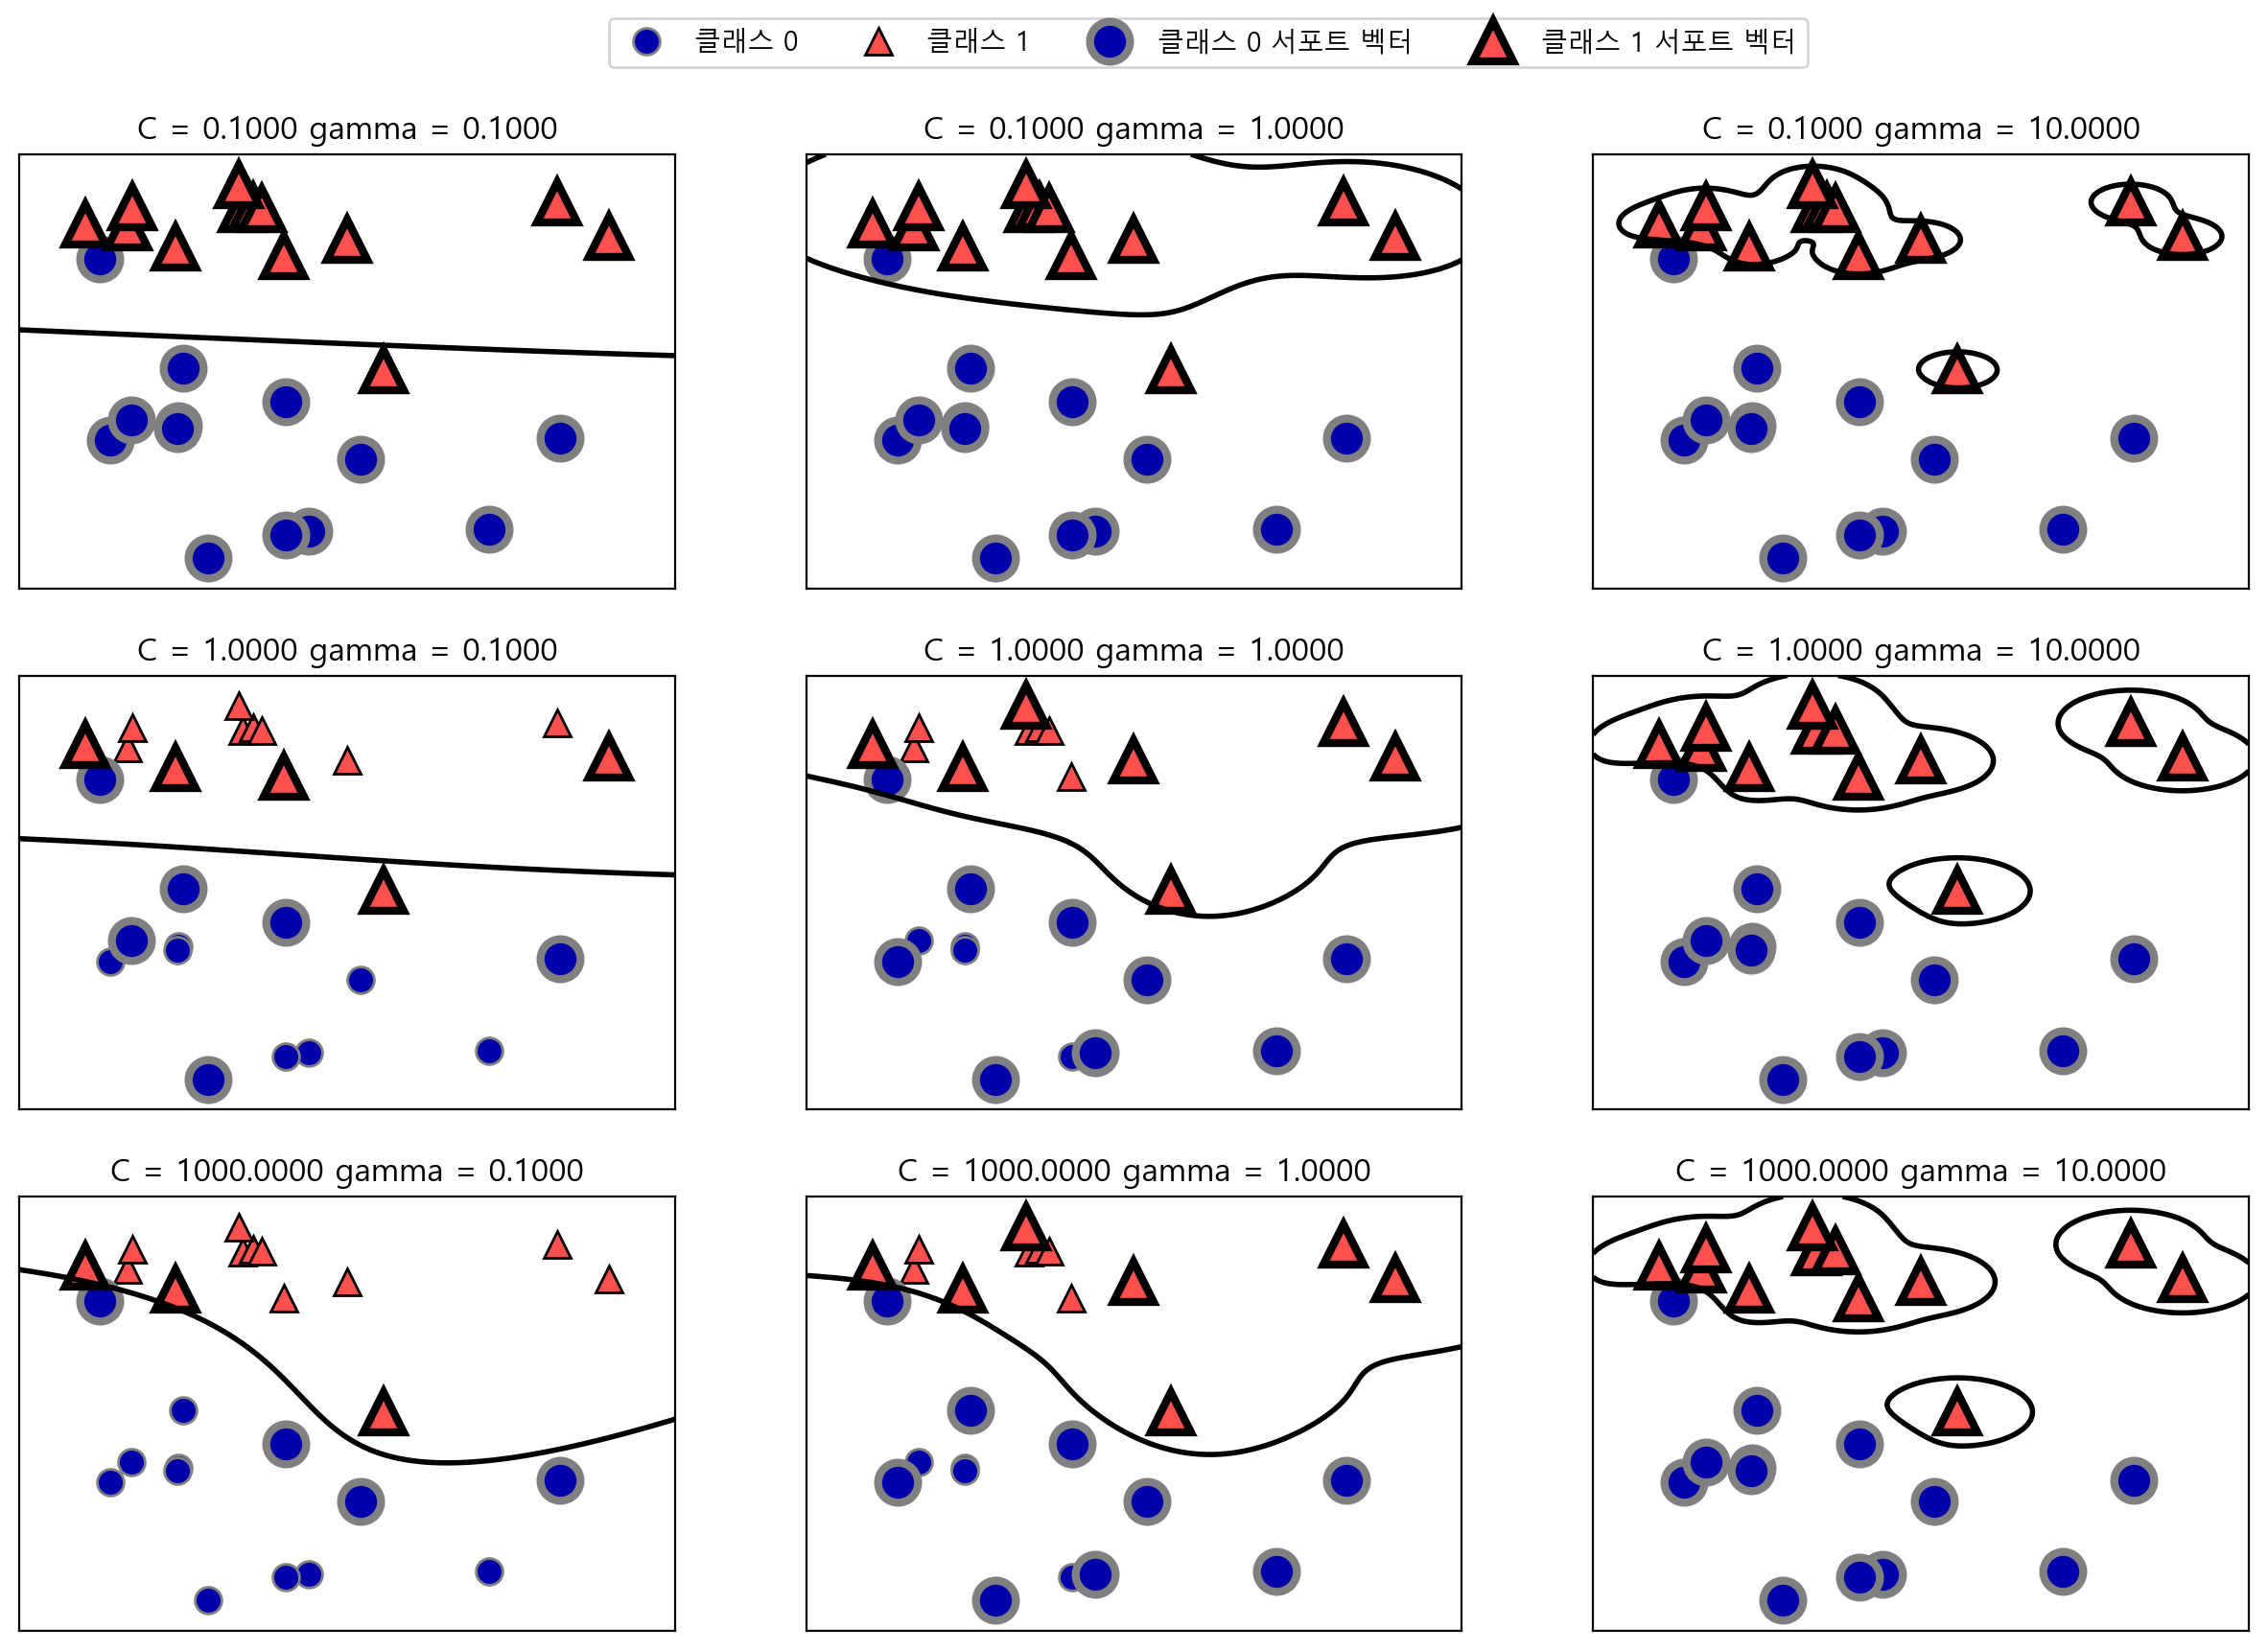

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"], ncol=4, loc=(.9, 1.2))
plt.show() # 책에는 없음

감마는 X, 즉 데이터의 분산= 가중치에 영향을 받음= 같은 애들끼리 묶음

C는 제약조건의 강도. C가 높을 수록 조건의 강도가 세짐. 

감마와 C값은 대칭됨. 따라서 균형점을 찾아야함. C를 먼저 수정해본다.

### SVM-Q1. SVC를 활용하여 분류 문제를 해결하세요.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer= load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=42)

svc= SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9107981220657277
0.951048951048951


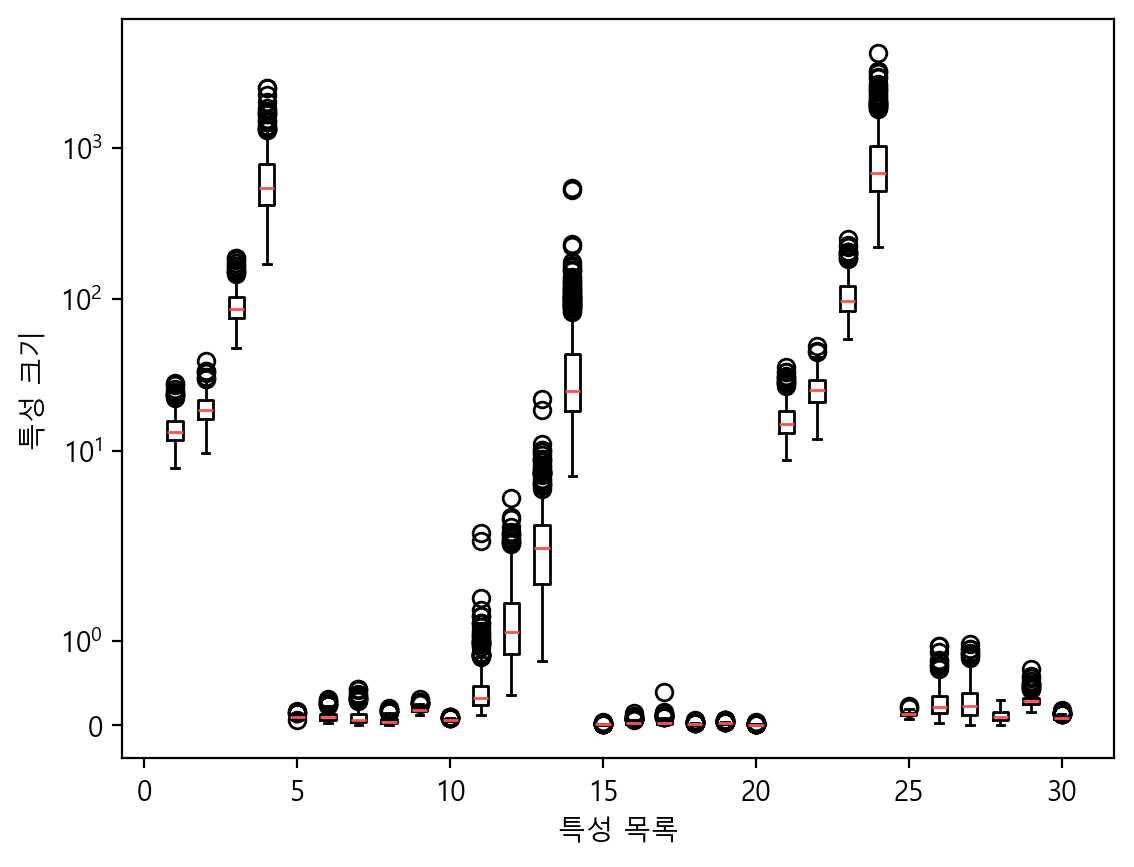

In [11]:
# 데이터 특성
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

### SVM-Q2. SVM에 적합한 전처리를 진행하세요.

In [19]:
min_on_training= X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
#데이터를 비교가능하게 만듬. 데이터를 0과 1사이로 밀어넣는 방법.
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled= (X_test - min_on_training) / range_on_training

svc= SVC()
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9835680751173709
0.9790209790209791


### SVM-Q3. SVM의 C값을 조정하세요.

In [21]:
min_on_training= X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
#데이터를 비교가능하게 만듬. 데이터를 0과 1사이로 밀어넣는 방법.
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled= (X_test - min_on_training) / range_on_training

svc= SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

1.0
0.951048951048951
